# Introduction
In this Part, we will perform machine learning! More specifically, unsupervised machine learning. 

In unsupervised machine learning, we let the model figure out the clusters and where each row of data goes. 

This is an exciting part, where you will do the following:
1. Import the libraries required and load the CSV from previous Part
2. Scale the R/F/M values
3. Plot the scaled quantities
4. Perform KMeans clustering with an arbitrary number of clusters
5. Optimize the number of clusters
6. Reperform the KMeans clustering with the optimized number of clusters
7. Compare the clustering analysis with the RFM-segmented customers in Part IV

### Step 1:  Import your library
Import the following:
1. pandas as pd
2. StandardScaler from sklearn.preprocessing
3. KMeans from sklearn.cluster
4. matplotlib.pyplot as plt
5. mplot3d from mpl_toolkits

In [1]:
# Step 1: Import the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Step 2: Read the CSV from Part IV, Step 12
Make sure your Customer ID is the index, as we will be transforming the values in Recency, Frequency, and Monetary <strong>only</strong> using the StandardScaler. 

If Customer ID part of the columns and not the index, you'll be transforming those values as well make sure Customer ID is your index.

In [2]:
# Step 2: Read the CSV from Part IV, Step 12
Cus=pd.read_csv('/Users/sm/Desktop/CourseMaterials/merge_dataset v0.2.csv', index_col='Customer ID')
Cus

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,RF,Segment
Customer ID,,,,,,,,,
12346,347,12,77556.46,2,5,5,255,25,Can't Lose
12347,24,8,5633.32,5,4,5,545,54,Champions
12348,97,5,2019.40,3,4,4,344,34,Loyal Customers
12349,40,4,4428.69,5,3,5,535,53,Potential Loyalists
12350,332,1,334.40,2,1,2,212,21,Hibernating
...,...,...,...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4,554,55,Champions
18284,453,1,461.68,1,2,2,122,12,Hibernating
18285,682,1,427.00,1,2,2,122,12,Hibernating


### Step 3: Scale your Recency, Frequency, and Monetary
Time to scale your values. Before we can perform our clustering, we will need to transform our values to be on the same scale, i.e. mean 0 and standard deviation of 1. 

This is because the scale of the three different quantities are totally different. For eaxmple, Recency ranges between 22 to 760 whereas Monetary ranges between 2.95 to 608,821. We need them to be in the same range for clustering algorithms to work. 

To scale the quantities into a similar range of values, we will use the StandardScaler. 

1. Declare a StandardScaler object
2. Perform a fit_transform method on the entire DataFrame

You'll get a NumPy array that looks something like this:

![StandardScaledDF.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/StandardScaledDF.png)

<strong>Hint: Google "how to use standardscaler python"</strong>

In [3]:
# Step 3: Scale your DataFrame values with a StandardScaler
scaler = StandardScaler()
stand_scores=scaler.fit_transform(Cus[['Recency','Frequency','Monetary']])
stand_scores

array([[ 0.59298505,  0.4388927 ,  5.05805027],
       [-0.94998781,  0.13143374,  0.17743068],
       [-0.60126639, -0.09916048, -0.06780567],
       ...,
       [ 2.19328197, -0.40661944, -0.17586406],
       [ 1.31431292, -0.3297547 , -0.11686556],
       [-0.75890758,  0.054569  ,  0.079013  ]])

### Step 4: Turn your NumPy array into a DataFrame
If you're used to working with NumPy arrays and have no issues working with this, no problem.

However, for those who are more used to working with DataFrames, you can consider turning the array into a DataFrame (it's only one line of code, even). 

We'll need a proper DataFrame when we create a column for our Label.

Give it a column name of RecencyScaled, FrequencyScaled, and MonetaryScaled.

<strong>Hint: Google "create Pandas DataFrame from a Numpy array in Python"</strong>

In [12]:
# Step 4: Turn the NumPy array into a DataFrame
StandScale = pd.DataFrame(data=stand_scores, columns=['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled'])
StandScale

,RecencyScaled,FrequencyScaled,MonetaryScaled
0,0.592985,0.438893,5.058050
1,-0.949988,0.131434,0.177431
2,-0.601266,-0.099160,-0.067806
3,-0.873556,-0.176025,0.095686
4,0.521330,-0.406619,-0.182148
...,...,...,...
5873,-0.945211,1.207540,-0.019134
5874,1.099348,-0.406619,-0.173511
5875,2.193282,-0.406619,-0.175864
5876,1.314313,-0.329755,-0.116866


### Step 5: Plot your scaled Recency, Frequency, Monetary as 3D coordinates
Whether you have a numpy array, or a DataFrame, let's try plotting the three sets of coordinates in a 3D plot. 

We will plot the scaled Recency in the x-axis, scaled Frequency in the y-axis, and scaled Monetary in the z-axis.  

By plotting the point on a 3D plot, we can intuitively grasp where possible clusters may be. 

![3Dplot.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/3Dplot.png)

<strong>Hint: Google "3d scatter plot in python using matplotlib"</strong>

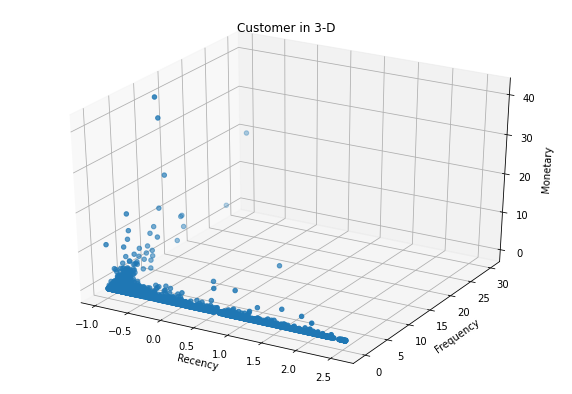

In [5]:
# Step 5: Plot a 3D scatter plot using the scaled values
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating plot
sctt = ax.scatter3D(StandScale['RecencyScaled'], StandScale['FrequencyScaled'], StandScale['MonetaryScaled'])
plt.title("Customer in 3-D")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# show plot
plt.show()

### Step 6: Perform KMeans clustering with 10 clusters
After we're done plotting, let's start clustering! We don't have a fixed number of clusters, so let's start with 10 clusters like Part IV's RFM segments

Clustering is not unlike training a supervised model where you have to:
1. Declare a variable containing the KMeans object with 10 clusters in the parameter.
2. Fit the DataFrame into the model
3. Predict the labels for each of the rows in the DataFrame
4. Create a column named 'Label' in the DataFrame
5. Get the <strong>cluster centers</strong> from the trained KMeans model

Useful reading (official documentation rocks): https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [13]:
# Step 6: Train a KMeans model to predict the labels for the dataset
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(StandScale)
StandScale['Label']=kmeans.predict(StandScale)
centers=kmeans.cluster_centers_

### Step 7: Turn the cluster center NumPy into a DataFrame
Similar to the results of scaling, for easier manipulation you can consider turning the NumPy array into a DataFrame first before plotting. 

In [17]:
# Step 7: Create a DataFrame containing the cluster centers' coordinates
centersdf=pd.DataFrame(data=centers, columns=['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled'])

### Step 8: Plot both the scaled values and cluster centers
Now that you've created the labels from the unsupervised machine learning, and the cluster center coordinates, it's time to plot all of them and see how it looks. 

![3DplotWithClusterCenters.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/3DplotWithClusterCenters.png)

A few things to take note:
1. Add color to your scatter for your scaled values by using labels you generated with the c parameter
2. When plotting the cluster centers, add a marker and increase the marker size 

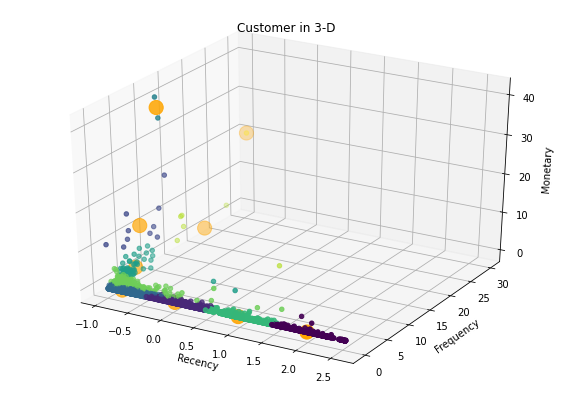

In [23]:
# Step 8: PLot your 3D scatter plot with the labels and the cluster centers

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating plot
sctt = ax.scatter3D(StandScale['RecencyScaled'], StandScale['FrequencyScaled'], StandScale['MonetaryScaled'], c=StandScale['Label'])
sctt2 = ax.scatter3D(centersdf['RecencyScaled'], centersdf['FrequencyScaled'], centersdf['MonetaryScaled'], s=200, c='orange')
plt.title("Customer in 3-D")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# show plot
plt.show()

## Optimizing the number of clusters
The number of clusters is arbitrary, and there should be a better way to assess the number of clusters we can/should use. 

To do this, we use the Within-Cluster-Sum-of-Squares (WCSS) method. WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

Useful reading: https://analyticsindiamag.com/beginners-guide-to-k-means-clustering 

### Step 9: Plot the WCSS curve
The WCSS for each KMeans run can be obtained by retrieving the inertia_ attribute. So to construct a WCSS plot, these are the steps:

1. Create an empty list
2. Use a for loop to loop through a range between 1 to 15
3. In each loop
    - declare a KMeans classifier object, with the current value in the range as the number of clusters
    - perform a KMeans clustering
    - append the .inertia_ of the trained model into the list that you created in 1
4. Plot a line plot containing the range of clusters (x-axis), against the list of WCSS scores (y-axis)

If you do it right, you'll see a chart like this:

![WCSSElbowPointGraph.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/WCSSElbowPointGraph.png)

The best number of clusters lies at the elbow point, the point where there is no more dramatic decrease in the WCSS. 

It's from visual inspection, so either usually either one value or the other. Both are fine! 

In [26]:
# Step 9a: Create a list of WCSS based on different number of clusters, between 1 to 14
wcss=[]
for i in range(1, 15):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(StandScale[['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled']])
    #appending the WCSS to the list 
    wcss.append(kmeans.inertia_)

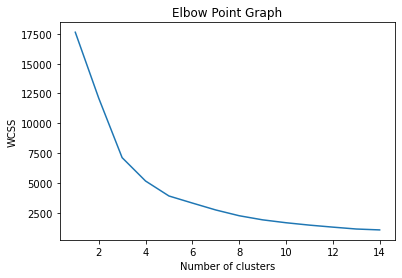

In [25]:
# Step 9b: Plot the WCSS Elbow Point Graph
#Plotting The Elbow graph
plt.plot(range(1, 15), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Step 10: Repeat Steps 6 - 8 with the optimized number of clusters
Now that you've figured out the best number of clusters, it's time to redo the analysis in Steps 6-8.

In [28]:
# Step 10a: Perform the clustering step with the new number of clusters

kmeans6 = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans6.fit(StandScale[['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled']])
StandScale['Label6']=kmeans6.predict(StandScale[['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled']])
centers6=kmeans6.cluster_centers_

centersdf6=pd.DataFrame(data=centers6, columns=['RecencyScaled', 'FrequencyScaled', 'MonetaryScaled'])

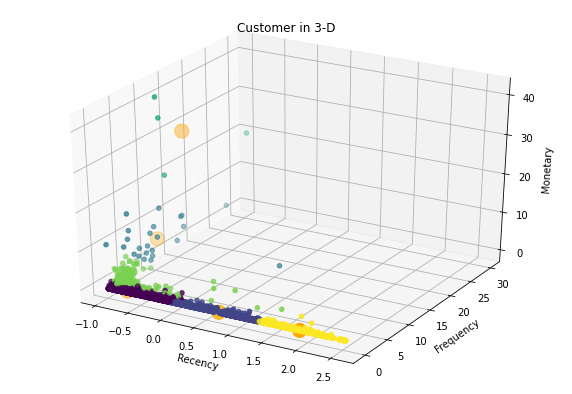

In [29]:
# Step 10b: Plot the values with the labels, and the cluster centers

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

# Creating plot
sctt = ax.scatter3D(StandScale['RecencyScaled'], StandScale['FrequencyScaled'], StandScale['MonetaryScaled'], c=StandScale['Label6'])
sctt2 = ax.scatter3D(centersdf6['RecencyScaled'], centersdf6['FrequencyScaled'], centersdf6['MonetaryScaled'], s=200, c='orange')
plt.title("Customer in 3-D")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# show plot
plt.show()

### Step 11: Load the CSV that you exported from Step 18 in Part IV
Remember the table with the customers divided into the different segments? 

![SegmentDataFrame.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/SegmentDataFrame.png)

Let's load it up and compare it with the clusters. 

In [31]:
# Step 11: Load the CSV that you exported from Step 16 in Part IV
Segment=pd.read_csv('/Users/sm/Desktop/CourseMaterials/merge_dataset v0.2.csv')
Segment

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,RF,Segment
0,12346,347,12,77556.46,2,5,5,255,25,Can't Lose
1,12347,24,8,5633.32,5,4,5,545,54,Champions
2,12348,97,5,2019.40,3,4,4,344,34,Loyal Customers
3,12349,40,4,4428.69,5,3,5,535,53,Potential Loyalists
4,12350,332,1,334.40,2,1,2,212,21,Hibernating
...,...,...,...,...,...,...,...,...,...,...
5873,18283,25,22,2736.65,5,5,4,554,55,Champions
5874,18284,453,1,461.68,1,2,2,122,12,Hibernating
5875,18285,682,1,427.00,1,2,2,122,12,Hibernating
5876,18286,498,2,1296.43,1,3,4,134,13,At Risk


### Step 12: Merge the two DataFrames together
Now that you've loaded your CSV from the previous Part, it's time to combine the two DataFrames together.

![MergedDataFrame.png](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectSalesAnalysis/MergedDataFrame.png)

A few things to take note of:
1. Make sure you have the label and the segments in the merged DataFrame
2. The labelling is random, don't be surprised if the labels you have is different from the picture above
3. The Customer ID has disappeared, but you can change the index again if you want to

<strong>Hint: Google "merge two dataframe by index"</strong>

In [39]:
# Step 12: Merge the two DataFrames together
T1=Segment.drop(['Customer ID', 'RF'], axis=1)
T2=StandScale['Label6']
Merge2=pd.merge(T1, T2, left_index=True, right_index=True)
Merge2

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM,Segment,Label6
0,347,12,77556.46,2,5,5,255,Can't Lose,4
1,24,8,5633.32,5,4,5,545,Champions,0
2,97,5,2019.40,3,4,4,344,Loyal Customers,0
3,40,4,4428.69,5,3,5,535,Potential Loyalists,0
4,332,1,334.40,2,1,2,212,Hibernating,1
...,...,...,...,...,...,...,...,...,...
5873,25,22,2736.65,5,5,4,554,Champions,4
5874,453,1,461.68,1,2,2,122,Hibernating,1
5875,682,1,427.00,1,2,2,122,Hibernating,5
5876,498,2,1296.43,1,3,4,134,At Risk,5


### Step 13: Compare the Labels to the Segment
Final step! Time to compare the labels to the segment and see how they differ and how they are similar. 

There are a few ways to do this, but here's a suggestion:
1. Slice the DataFrame based on label value
2. Perform a value count on the Segment 

That way, you can see the breakdown of Segments per label. 

In [42]:
# Step 13: Compare the labels to segment
pd.pivot_table(Merge2, values='RFM', index='Label6', columns='Segment', aggfunc='count')

Segment,About to Sleep,At Risk,Can't Lose,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Label6,,,,,,,,,,
0,388.0,42.0,12.0,580.0,19.0,1048.0,269.0,56.0,712.0,110.0
1,NaN,574.0,43.0,NaN,868.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,19.0,NaN,3.0,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8.0,249.0,NaN,96.0,NaN,NaN,NaN,NaN
5,NaN,134.0,7.0,NaN,635.0,NaN,NaN,NaN,NaN,NaN


We hope you noticed that there are overlaps between your RFM and unsupervised machine learning and how this can be used to complement your customer segmentation.

Try a few more combinations by varying the number of clusters and see if the clustering matches what you see in the RFM segments. 

# The end
And that's the end! To recap, you've:
1. Performed data collection and data cleaning
2. Explored the data and answered business questions from a hypothetical business owner
3. Performed data cleaning
4. Performed a RFM segmentation
5. Trained an unsupervised classifier to segment your customers
6. Compared the RFM-segmented customers with the ones that you used machine learning on

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and unsupervised machine learning. 

Truth be told, there's a lot of things to explore, e.g., the Description data, but we leave it to your imagination and creativity. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. 

You got this! 